<a href="https://colab.research.google.com/github/vandanapanil/Vandana-P-Anil/blob/main/Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("cars.csv")
print(df.shape)

print(df.isnull().sum)
target = 'Fuel Information.City mpg'
Features = ['Engine Information.Engine Statistics.Horsepower',
            'Engine Information.Engine Statistics.Torque',
            'Dimensions.Width']
df[Features] = df[Features].apply(pd.to_numeric, errors = 'coerce')
df = df.dropna(subset=Features + [target])

(5076, 18)
<bound method DataFrame.sum of       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                 False              False             False   
1                 False              False             False   
2                 False              False             False   
3                 False              False             False   
4                 False              False             False   
...                 ...                ...               ...   
5071              False              False             False   
5072              False              False             False   
5073              False              False             False   
5074              False              False             False   
5075              False              False             False   

      Engine Information.Driveline  Engine Information.Engine Type  \
0                            False                           False   
1                            False               

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df[Features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the test sets
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

# Check for missing values in X_test
print(X_test.isnull().sum())  # Add parentheses to correctly call isnull()

# Drop any rows with missing values in X_test
X_test = X_test.dropna()

# Print the cleaned X_test data
print(X_test)

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Output the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)


X_test shape:  (1016, 3)
y_test shape:  (1016,)
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
Dimensions.Width                                   0
dtype: int64
      Engine Information.Engine Statistics.Horsepower  \
842                                               170   
4832                                              200   
33                                                310   
4761                                              170   
1491                                              240   
...                                               ...   
1485                                              171   
4986                                              170   
1038                                              260   
1623                                              261   
2572                                              280   

      Engine Information.Engine Statistics.Torque  Dimensions.Width  
842                      

In [ ]:
y_pred = model.predict(X_test)

print("y_pred shape: ",y_pred.shape)
print("y_test shape: ",y_test.shape)
mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error: ",mse)
r2 = r2_score(y_test, y_pred)
print("R_sqaure: ",r2)

y_pred shape:  (1016,)
y_test shape:  (1016,)
Mean Square Error:  8.718785542308606
R_sqaure:  0.5705307656680281


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

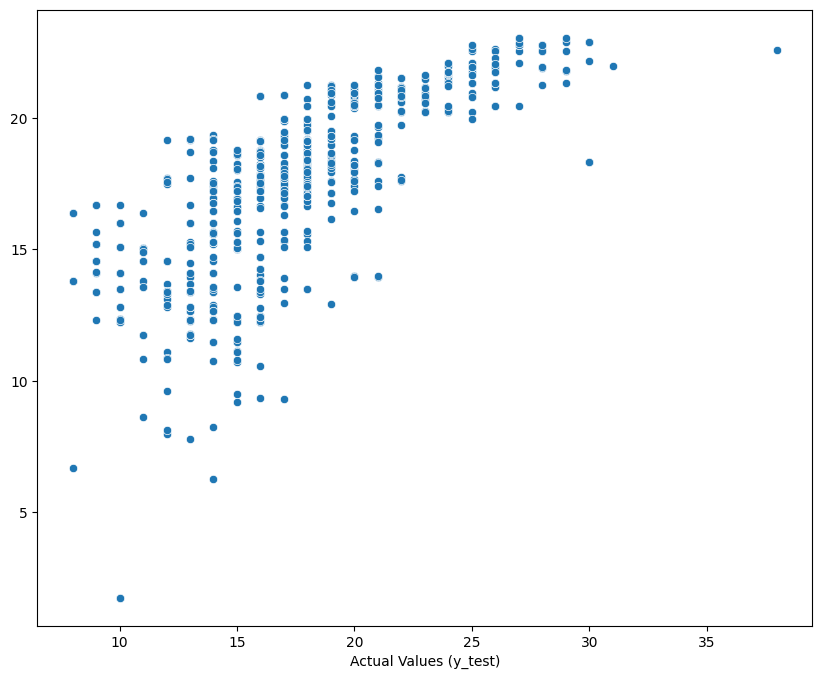

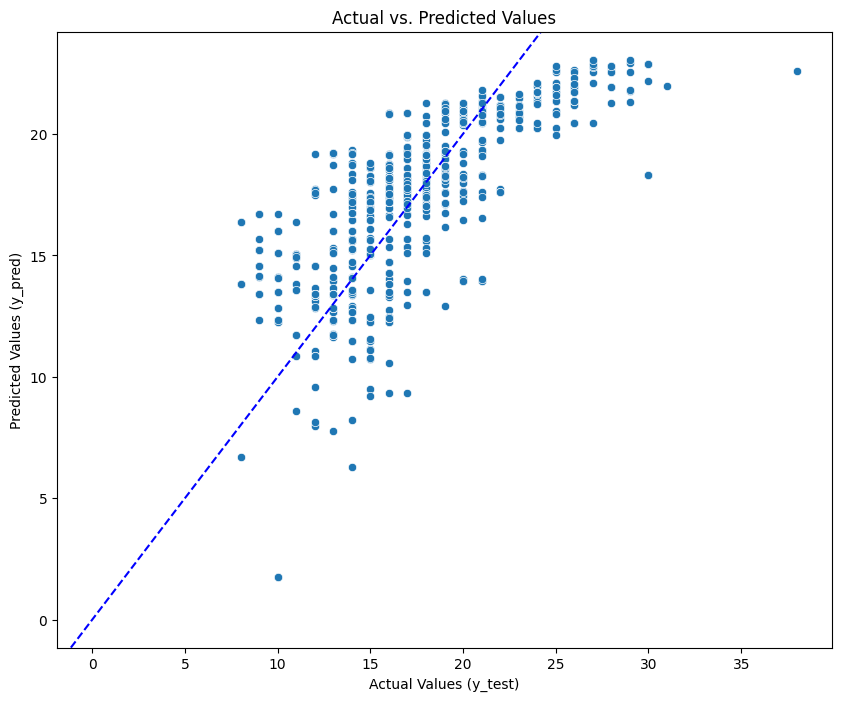

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values (y_test)")
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values (y_test)")
plt.ylabel("Predicted Values (y_pred)")
plt.title("Actual vs. Predicted Values")
plt.axline((0,0), slope=1, color='b', linestyle='--')
plt.show()